In [1]:
import os
import pandas as pd
import multiprocessing as mp

# Specify the file path
file_path = '/kaggle/input/steam-reviews-2021/steam_reviews.csv'

# Function to load CSV
def load_csv(file_path, columns, dtypes):
    # Read the CSV file into a DataFrame
    return pd.read_csv(file_path, usecols=columns, dtype=dtypes)

# Columns and data types to load
columns = ['app_name', 'review_id', 'language', 'timestamp_created', 'timestamp_updated', 'recommended', 'votes_helpful', 'author.steamid', 'author.num_games_owned', 'author.num_reviews']
dtypes = {
    'app_name': str,
    'review_id': str,
    'language': str,
    'timestamp_created': int,
    'timestamp_updated': int,
    'recommended': bool,
    'votes_helpful': int,
    'author.steamid': str,
    'author.num_games_owned': int,
    'author.num_reviews': int
}

# Main function to handle multiprocessing
def main():
    with mp.Pool(processes=1) as pool:  # Use more processes if loading multiple files
        # Load the CSV file using the multiprocessing pool
        app_name_data = pool.starmap(load_csv, [(file_path, columns, dtypes)])
    
    return app_name_data[0]  # Return the first (and only) result

# Execute the main function
app_name_df = main()

# Display the DataFrame (if in a notebook, this will render it nicely)
print(app_name_df.head(10))


                   app_name review_id  language  timestamp_created  \
0  The Witcher 3: Wild Hunt  85185598  schinese         1611381629   
1  The Witcher 3: Wild Hunt  85185250  schinese         1611381030   
2  The Witcher 3: Wild Hunt  85185111  schinese         1611380800   
3  The Witcher 3: Wild Hunt  85184605   english         1611379970   
4  The Witcher 3: Wild Hunt  85184287  schinese         1611379427   
5  The Witcher 3: Wild Hunt  85184171   english         1611379264   
6  The Witcher 3: Wild Hunt  85184064   english         1611379091   
7  The Witcher 3: Wild Hunt  85183602   turkish         1611378312   
8  The Witcher 3: Wild Hunt  85183227  schinese         1611377703   
9  The Witcher 3: Wild Hunt  85182785   spanish         1611377005   

   timestamp_updated  recommended  votes_helpful     author.steamid  \
0         1611381629         True              0  76561199095369542   
1         1611381030         True              0  76561198949504115   
2         161138

# **[RQ5] - Ex.1**

In [2]:
# Determine the ten reviewers with the highest number of reviews
top_reviewers = app_name_df.groupby('author.steamid')['author.num_reviews'].sum().nlargest(10)

# Convert to DataFrame for better readability
top_reviewers_df = top_reviewers.reset_index()

# Display the top reviewers
print(top_reviewers_df)

      author.steamid  author.num_reviews
0  76561198103272004       4398046511108
1  76561198848008157       4398046511105
2  76561198045381877              244662
3  76561198062813911              241529
4  76561197960373660              202713
5  76561198094803808              196877
6  76561197974092119              190141
7  76561198013146396              189568
8  76561198043049777              170072
9  76561198116879965              163030


# **[RQ5] - Ex.2**

In [3]:
# Determine the ten reviewers with the highest number of reviews
top_reviewers = app_name_df.groupby('author.steamid')['author.num_reviews'].sum().nlargest(10)

# Get the steam IDs of the top reviewers
top_reviewers_ids = top_reviewers.index

# Filter the original DataFrame to include only the reviews from the top reviewers
top_reviewers_df = app_name_df[app_name_df['author.steamid'].isin(top_reviewers_ids)]

# Calculate the count of each language used by these top reviewers
language_counts = top_reviewers_df['language'].value_counts()

# Calculate the percentage of each language
total_reviews = language_counts.sum()
language_percentage = (language_counts / total_reviews) * 100

# Convert to DataFrame for better readability
language_percentage_df = language_percentage.reset_index()
language_percentage_df.columns = ['Language', 'Percentage']

# Display the results
print(language_percentage_df)

    Language  Percentage
0    english   61.022364
1    russian   21.086262
2  brazilian    8.945687
3     polish    8.785942
4      latam    0.159744


# **[RQ5] - Ex.3**

In [4]:
# Calculate the average number of helpful votes for these top reviewers
average_helpful_votes = top_reviewers_df.groupby('author.steamid')['votes_helpful'].mean()

# Convert to DataFrame for better readability
average_helpful_votes_df = average_helpful_votes.reset_index()

# Display the results
print(average_helpful_votes_df)

      author.steamid  votes_helpful
0  76561197960373660       6.040816
1  76561197974092119       7.727273
2  76561198013146396       0.969697
3  76561198043049777       6.300000
4  76561198045381877       2.252427
5  76561198062813911       0.885906
6  76561198094803808       4.213333
7  76561198103272004       0.000000
8  76561198116879965      10.205882
9  76561198848008157       0.000000


# **[RQ5] - Ex.4**

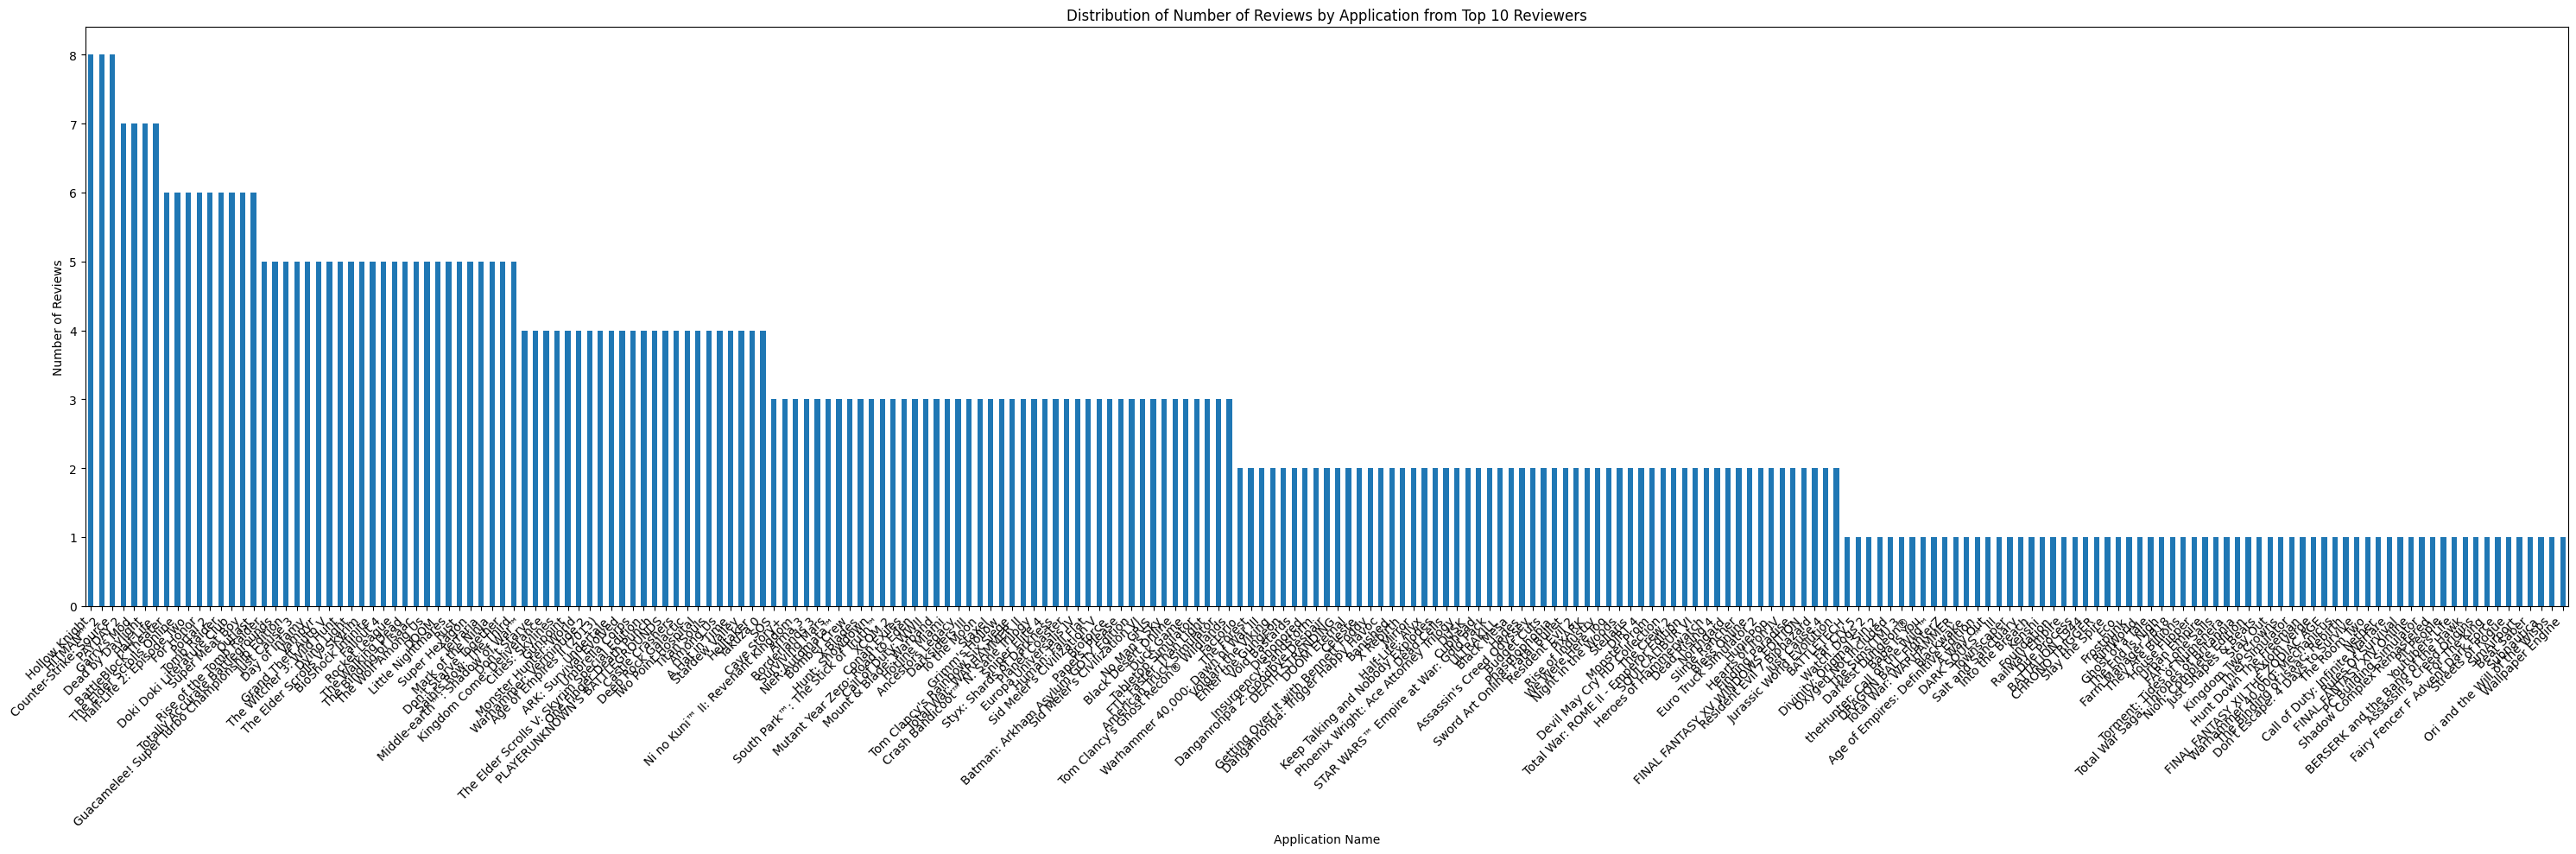

In [5]:
import matplotlib.pyplot as plt

# Count the number of reviews for each application
app_review_counts = top_reviewers_df['app_name'].value_counts()

# Sort the counts in descending order
app_review_counts_sorted = app_review_counts.sort_values(ascending=False)

# Plotting the distribution
plt.figure(figsize=(30, 10))
app_review_counts_sorted.plot(kind='bar')
plt.title('Distribution of Number of Reviews by Application from Top 10 Reviewers')
plt.xlabel('Application Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **[RQ6] - Ex.1**

In [6]:
# Filter data for English and Spanish reviewers
english_reviewers = app_name_df[app_name_df['language'] == 'english']
spanish_reviewers = app_name_df[app_name_df['language'] == 'spanish']

# Determine if reviews were edited
english_reviewers['edited or updated'] = english_reviewers['timestamp_updated'] > english_reviewers['timestamp_created']
spanish_reviewers['edited or updated'] = spanish_reviewers['timestamp_updated'] > spanish_reviewers['timestamp_created']

# Calculate the proportion of edited reviews
english_edit_rate = english_reviewers['edited or updated'].mean()
spanish_edit_rate = spanish_reviewers['edited or updated'].mean()

# Display the results
print(f"Percentage of English reviewers who edited or updated their reviews: {english_edit_rate * 100:.2f}%")
print(f"Percentage of Spanish reviewers who edited or updated their reviews: {spanish_edit_rate * 100:.2f}%")

# Compare which group is more likely to edit their reviews
if english_edit_rate > spanish_edit_rate:
    print("English reviewers are more likely to edit or update their reviews.")
elif spanish_edit_rate > english_edit_rate:
    print("Spanish reviewers are more likely to edit or update their reviews.")
else:
    print("Both groups edit or update their reviews at the same rate.")

Percentage of English reviewers who edited or updated their reviews: 11.89%
Percentage of Spanish reviewers who edited or updated their reviews: 9.94%
English reviewers are more likely to edit or update their reviews.


/tmp/ipykernel_17/1526358878.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_reviewers['edited or updated'] = english_reviewers['timestamp_updated'] > english_reviewers['timestamp_created']
/tmp/ipykernel_17/1526358878.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spanish_reviewers['edited or updated'] = spanish_reviewers['timestamp_updated'] > spanish_reviewers['timestamp_created']


# **[RQ6] - Ex.2**

In [7]:
# Execute the main function
app_name_df = main()

# Filter data for English and Spanish reviewers
english_reviewers = app_name_df[app_name_df['language'] == 'english']
spanish_reviewers = app_name_df[app_name_df['language'] == 'spanish']

# Calculate the average number of games for each group
english_avg_games_account = english_reviewers['author.num_games_owned'].mean()
english_avg_games_reviewed = english_reviewers['author.num_reviews'].mean()

spanish_avg_games_account = spanish_reviewers['author.num_games_owned'].mean()
spanish_avg_games_reviewed = spanish_reviewers['author.num_reviews'].mean()

# Display the results
print(f"Average number of games in account for English reviewers: {english_avg_games_account:.2f}")
print(f"Average number of games reviewed by English reviewers: {english_avg_games_reviewed:.2f}")
print()
print(f"Average number of games in account for Spanish reviewers: {spanish_avg_games_account:.2f}")
print(f"Average number of games reviewed by Spanish reviewers: {spanish_avg_games_reviewed:.2f}")

# Interpretation of results
if english_avg_games_reviewed > spanish_avg_games_reviewed:
    print("English reviewers tend to review more games on average compared to Spanish reviewers.")
elif spanish_avg_games_reviewed > english_avg_games_reviewed:
    print("Spanish reviewers tend to review more games on average compared to English reviewers.")
else:
    print("Both groups review an equal number of games on average.")

Average number of games in account for English reviewers: 1369501.66
Average number of games reviewed by English reviewers: 456456.87

Average number of games in account for Spanish reviewers: 121.92
Average number of games reviewed by Spanish reviewers: 9.39
English reviewers tend to review more games on average compared to Spanish reviewers.


# **[RQ7] - Ex.1**

In [8]:
# Total number of reviews submitted
total_reviews = len(app_name_df)

# Count reviews with at least one helpful vote
reviews_with_helpful_votes = app_name_df[app_name_df['votes_helpful'] > 0]
count_helpful_votes = len(reviews_with_helpful_votes)

# Calculate the probability
probability_helpful_vote = count_helpful_votes / total_reviews

# Display the results
print(f"Total reviews submitted: {total_reviews}")
print(f"Total reviews with at least one helpful vote: {count_helpful_votes}")
print(f"Probability of receiving at least one helpful vote: {probability_helpful_vote:.4f}")

Total reviews submitted: 21747371
Total reviews with at least one helpful vote: 6105244
Probability of receiving at least one helpful vote: 0.2807


# **[RQ7] - Ex.2**

In [9]:
# Filter for non-recommendation reviews (where recommended is False)
non_recommendation_reviews = app_name_df[app_name_df['recommended'] == False]

# Total number of non-recommendation reviews
total_non_recommendation_reviews = len(non_recommendation_reviews)

# Count reviews with at least one helpful vote among non-recommendation reviews
non_recommendation_with_helpful_votes = non_recommendation_reviews[non_recommendation_reviews['votes_helpful'] > 0]
total_non_recommendation_with_helpful_votes = len(non_recommendation_with_helpful_votes)

# Calculate the probability
if total_non_recommendation_reviews > 0:
    probability_non_recommendation_helpful_vote = total_non_recommendation_with_helpful_votes / total_non_recommendation_reviews
else:
    probability_non_recommendation_helpful_vote = 0

# Display the results
print(f"Total non-recommendation reviews submitted: {total_non_recommendation_reviews}")
print(f"Total non-recommendation reviews with at least one helpful vote: {total_non_recommendation_with_helpful_votes}")
print(f"Probability of receiving at least one helpful vote (given non-recommendation): {probability_non_recommendation_helpful_vote:.4f}")

Total non-recommendation reviews submitted: 2724761
Total non-recommendation reviews with at least one helpful vote: 1320535
Probability of receiving at least one helpful vote (given non-recommendation): 0.4846


# **[RQ7] - Ex.3**

In [10]:
# Total number of reviews submitted
total_reviews = len(app_name_df)

# Count reviews with at least one helpful vote
reviews_with_helpful_votes = app_name_df[app_name_df['votes_helpful'] > 0]
count_helpful_votes = len(reviews_with_helpful_votes)

# Calculate the probability of receiving at least one helpful vote
P_A = count_helpful_votes / total_reviews

# Count reviewers with at least five reviews
reviewer_counts = app_name_df['author.steamid'].value_counts()
reviewers_with_five_reviews = reviewer_counts[reviewer_counts >= 5].index

# Filter the DataFrame for reviews by these reviewers
filtered_reviews = app_name_df[app_name_df['author.steamid'].isin(reviewers_with_five_reviews)]

# Count reviews with at least one helpful vote from these reviewers
count_helpful_votes_five_reviews = filtered_reviews[filtered_reviews['votes_helpful'] > 0]
count_reviews_five_reviews = len(filtered_reviews)

# Calculate the joint probability P(A ∩ B)
P_B = count_reviews_five_reviews / total_reviews  # Probability of having at least 5 reviews

# Calculate the joint probability
P_A_and_B = len(count_helpful_votes_five_reviews) / total_reviews

# Check for independence
independent = P_A_and_B == P_A * P_B

# Display results
print(f"Total reviews: {total_reviews}")
print(f"Total reviews with at least one helpful vote: {count_helpful_votes}")
print(f"Probability of receiving at least one helpful vote (P(A)): {P_A:.4f}")
print(f"Probability of having at least five reviews (P(B)): {P_B:.4f}")
print(f"Joint probability P(A ∩ B): {P_A_and_B:.4f}")
print(f"Are the events independent? {'Yes' if independent else 'No'}")

# Elaborate on the results
if independent:
    print("The events are independent, meaning that the probability of receiving helpful votes does not depend on whether the reviewer has submitted at least five reviews.")
else:
    print("The events are not independent, indicating that the likelihood of receiving helpful votes may be influenced by the number of reviews a reviewer has submitted.")

Total reviews: 21747371
Total reviews with at least one helpful vote: 6105244
Probability of receiving at least one helpful vote (P(A)): 0.2807
Probability of having at least five reviews (P(B)): 0.2291
Joint probability P(A ∩ B): 0.0847
Are the events independent? No
The events are not independent, indicating that the likelihood of receiving helpful votes may be influenced by the number of reviews a reviewer has submitted.


# **[RQ7] - Ex.4**

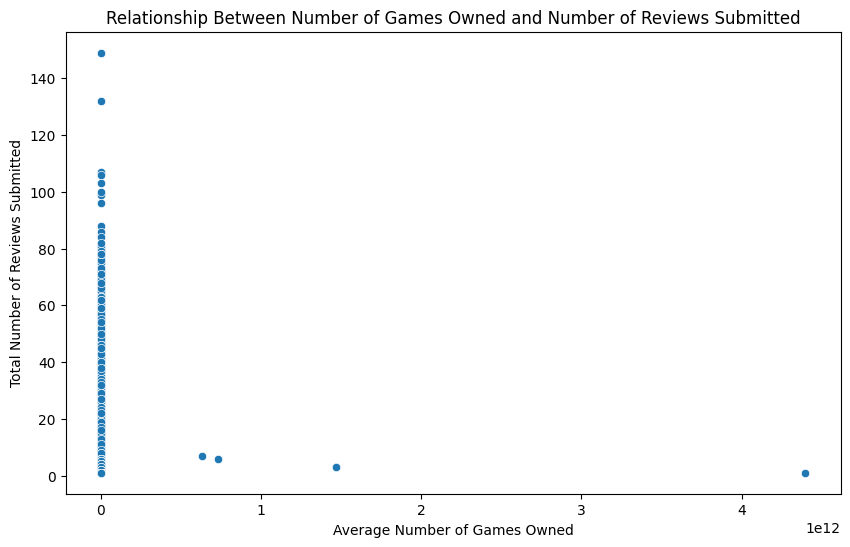

Correlation coefficient: 0.0002
                            OLS Regression Results                            
Dep. Variable:     author.num_reviews   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5521
Date:                Sun, 03 Nov 2024   Prob (F-statistic):              0.457
Time:                        15:33:22   Log-Likelihood:            -2.5131e+07
No. Observations:            12406560   AIC:                         5.026e+07
Df Residuals:                12406558   BIC:                         5.026e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Group by reviewer and aggregate data
aggregated_data = app_name_df.groupby('author.steamid').agg({
    'author.num_games_owned': 'mean',   # Average number of games owned
    'author.num_reviews': 'count'          # Total number of reviews submitted
}).reset_index()

# Rename columns for clarity
aggregated_data.columns = ['author.steamid', 'author.num_games_owned', 'author.num_reviews']

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=aggregated_data, x='author.num_games_owned', y='author.num_reviews')
plt.title('Relationship Between Number of Games Owned and Number of Reviews Submitted')
plt.xlabel('Average Number of Games Owned')
plt.ylabel('Total Number of Reviews Submitted')
plt.show()

# Calculate the correlation coefficient
correlation = aggregated_data['author.num_games_owned'].corr(aggregated_data['author.num_reviews'])
print(f"Correlation coefficient: {correlation:.4f}")

# Conduct a linear regression analysis
X = aggregated_data['author.num_games_owned']
y = aggregated_data['author.num_reviews']

# Adding a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# **[RQ7] - Ex.5**

1. Histograms
•	Purpose: Visualize the distribution of a continuous variable by showing frequency across bins.
•	Insights: Distribution shape, central tendency, spread, and outliers.
2. Bar Plots
•	Purpose: Compare categorical data, displaying values for each category as bars.
•	Insights: Comparative analysis, trends over time, and category contributions.
3. Scatter Plots
•	Purpose: Show the relationship between two continuous variables with points representing observations.
•	Insights: Correlation (positive, negative), clusters, and outliers.
4. Pie Charts
•	Purpose: Represent proportions of a whole with slices for each category.
•	Insights: Proportional representation of categories within a total.
Application in Statistical Analysis
•	Exploratory Data Analysis (EDA): Quickly identify patterns and anomalies.
•	Hypothesis Testing: Help formulate hypotheses and select tests.
•	Communication: Simplify complex data for better stakeholder understanding.
Conclusion
These visualizations are essential tools for analyzing data and gaining insights, aiding in effective decision-making.

The results from an LLM (like ChatGPT, Claude AI, Gemini) can be quite useful, but it's important to consider their limitations:
1.	Trustworthiness: While LLMs generate responses based on a vast amount of text data, they may not always provide the most accurate or context-specific information. Their answers can reflect general knowledge but lack the ability to verify facts in real-time.

2.	Improving Confidence:
o	Cross-Verification: Validate LLM information against reliable sources (e.g., academic papers, textbooks).
o	Provide Context: Offering detailed context when asking questions helps tailor responses to your needs.
o	Statistical Rigor: Supplement insights with actual statistical analyses using tools like R or Python.
o	Consult Experts: For critical decisions, seek input from statisticians or domain experts.
o	Continuous Learning: Engage in ongoing education about data analysis and visualization to enhance your assessment skills.
In summary, while LLMs can offer valuable insights, it's essential to complement their suggestions with thorough research and analytical rigor for trustworthy results.
